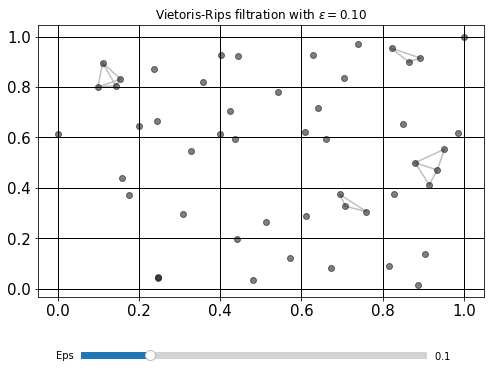

In [14]:
import numpy as np
import gudhi
import matplotlib.pyplot as plt

# Generar datos aleatorios
data = np.random.random((50,2))

# Calcular complejo simplicial de Vietoris-Rips
Rips_complex = gudhi.RipsComplex(points=data, max_edge_length=0.3)
Rips_simplex_tree = Rips_complex.create_simplex_tree(max_dimension=2)

# Crear figura interactiva
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.subplots_adjust(bottom=0.25)

# Plot inicial
eps_init = 0.1
triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps_init])
plt.triplot(data[:,0], data[:,1], triangles, color='gray', alpha=0.5)
plt.scatter(data[:, 0], data[:, 1], color='black', alpha=0.5)
plt.title(f"Vietoris-Rips filtration with $\epsilon={eps_init:.2f}$")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.xticks(size=15)
plt.yticks(size=15)

# Definir barra deslizante
axcolor = 'lightgoldenrodyellow'
ax_eps = plt.axes([0.2, 0.1, 0.6, 0.03], facecolor=axcolor)
slider_eps = plt.Slider(ax_eps, 'Eps', 0.0, 0.5, valinit=eps_init)

# Función de actualización de la gráfica
def update(val):
    eps = slider_eps.val
    ax.clear()
    triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])
    plt.triplot(data[:,0], data[:,1], triangles, color='gray', alpha=0.5)
    plt.scatter(data[:, 0], data[:, 1], color='black', alpha=0.5)
    plt.title(f"Vietoris-Rips filtration with $\epsilon={eps:.2f}$")
    plt.grid(color='black', linestyle='-', linewidth=1)
    plt.xticks(size=15)
    plt.yticks(size=15)
    
    # Gráfico de diagrama de persistencia
    plt.subplot(1, 2, 2)
    persistence = Rips_simplex_tree.persistence()
    gudhi.plot_persistence_barcode(persistence, axes=plt.gca(), legend=True)
    plt.title("Persistence barcode", size=15)
    
    fig.canvas.draw_idle()

# Asignar función de actualización a la barra deslizante
slider_eps.on_changed(update)


# Mostrar gráfica inicial
plt.show()



In [19]:
import numpy as np
import gudhi
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Generar los datos aleatorios
np.random.seed(1234)
data = np.random.uniform(size=(50,2))

# Calcular la homología persistente con Vietoris-Rips
Rips_complex = gudhi.RipsComplex(points=data, max_edge_length=0.3)
Rips_simplex_tree = Rips_complex.create_simplex_tree(max_dimension=2)
diag = Rips_simplex_tree.persistence()

# Definir la función que muestra la gráfica para un valor dado de eps
def plot_filtration(eps):
    triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])
    plt.triplot(data[:,0], data[:,1], triangles)
    plt.plot(data[:,0], data[:,1], '.')
    plt.title(f"Vietoris-Rips filtration with $\epsilon={eps:.2f}$")
    plt.grid(color='black', linestyle='-', linewidth=1)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()

# Crear el slider para cambiar el valor de eps
eps_slider = FloatSlider(min=0, max=0.5, step=0.01, value=0)

# Crear la función interactiva
interact(plot_filtration, eps=eps_slider)



interactive(children=(FloatSlider(value=0.0, description='eps', max=0.5, step=0.01), Output()), _dom_classes=(…

<function __main__.plot_filtration(eps)>

In [20]:
import numpy as np
import gudhi
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=100, noise=0.06, factor=0.5)

# Generate random points
np.random.seed(42)
#data = np.random.random((25, 2))

# Compute Vietoris-Rips complex
Rips_complex = gudhi.RipsComplex(points=data, max_edge_length=0.3)
Rips_simplex_tree = Rips_complex.create_simplex_tree(max_dimension=3)

# Define plot function
def plot_filtration(epsilon):
    # Compute simplex at epsilon
    triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= epsilon])

    # Plot triangulation
    plt.figure(figsize=(8, 8))
    plt.triplot(data[:, 0], data[:, 1], triangles, color='black', alpha=0.5)
    plt.scatter(data[:, 0], data[:, 1], color='black', alpha=0.5)

    # Plot persistence barcode
    plt.figure(figsize=(8, 4))
    gudhi.plot_persistence_barcode(Rips_simplex_tree.persistence(), legend=True)
    plt.xlim(0, epsilon)

# Create slider widget
epsilon_slider = widgets.FloatSlider(value=0.1, min=0, max=0.3, step=0.01, description=r'$\epsilon$')

# Update plot on slider change
widgets.interactive(plot_filtration, epsilon=epsilon_slider)


interactive(children=(FloatSlider(value=0.1, description='$\\epsilon$', max=0.3, step=0.01), Output()), _dom_c…